# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('crime.csv')
data.head()

,Date,Latitude,Longitude,Magnitude
0,2017-02-06T20:11:14.000Z,38.894376,-76.997556,4
1,2017-06-03T12:54:27.000Z,38.906838,-77.058661,6
2,2017-04-07T00:00:00.000Z,38.960739,-77.018034,16
3,2017-05-31T11:39:56.000Z,38.905151,-77.063998,4
4,2017-07-30T00:00:00.000Z,38.949532,-77.020246,16


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33116 entries, 0 to 33115
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       33116 non-null  object 
 1   Latitude   33116 non-null  float64
 2   Longitude  33116 non-null  float64
 3   Magnitude  33116 non-null  object 
dtypes: float64(2), object(2)
memory usage: 1.0+ MB


In [4]:
data['Magnitude'].unique()

array(['4', '6', '16', '12', '8', '10', '2', 'ARSON', '14'], dtype=object)

In [5]:
data['Magnitude'].value_counts()

4        14474
6        10260
8         2408
10        2173
12        1856
2         1531
14         294
16         115
ARSON        5
Name: Magnitude, dtype: int64

### The magnitude contains a string value Arson which is the act of willingly burning someone's house. Since there are only 5 values of arson , we can drop them.

In [6]:
data = data[data['Magnitude'] != 'ARSON']

In [7]:
data['Magnitude'].unique()

array(['4', '6', '16', '12', '8', '10', '2', '14'], dtype=object)

### Converting the Magnitude column to integer type

In [8]:
data['Magnitude']=data['Magnitude'].astype(str).astype(int)

In [9]:
data = data.drop('Date',axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33111 entries, 0 to 33115
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   33111 non-null  float64
 1   Longitude  33111 non-null  float64
 2   Magnitude  33111 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 905.4 KB


# KMeans class 

In [11]:
np.random.seed(42)

In [12]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [35]:
class KMeanss():

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()
    def cent(self):
        return self.centroids

In [34]:
X = np.array(data)
X

array([[ 38.89437604, -76.99755622,   4.        ],
       [ 38.90683791, -77.05866107,   6.        ],
       [ 38.96073891, -77.01803392,  16.        ],
       ...,
       [ 38.9197388 , -77.03339489,   4.        ],
       [ 38.93776635, -76.97418624,   4.        ],
       [ 38.95142333, -77.02381136,   6.        ]])

## Finding the optimum number of clusters using the Elbow method(WSS) present in sklearn kmeans class

In [30]:
from sklearn.cluster import KMeans

In [21]:
wss=[]
k_val=[]
for i in range(1,51):
    k = KMeans(n_clusters=i)
    k.fit(X)
    wss.append(k.inertia_)
    k_val.append(i)

### Plotting the wss graph

<ipython-input-22-6b4182c945d6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes= plt.axes()


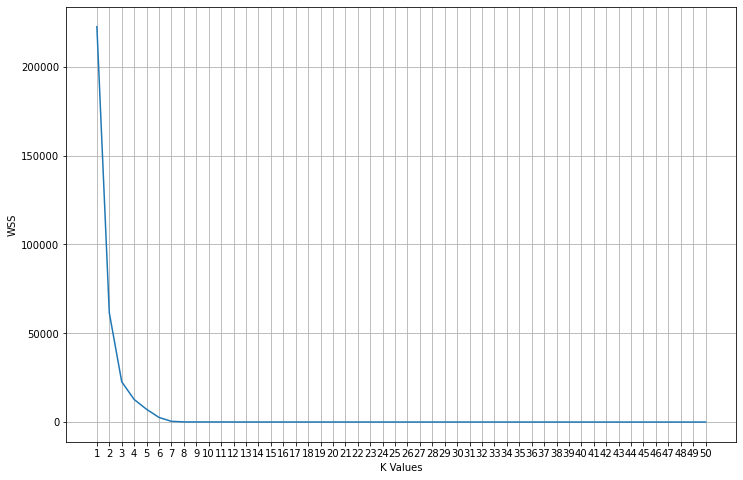

In [22]:
plt.figure(figsize=(12,8))
plt.xlabel('K Values')
plt.ylabel('WSS')
axes= plt.axes()
axes.set_xticks(k_val)
plt.grid()
plt.plot(k_val,wss)

## The optimum value of K is 6

In [36]:
k = KMeanss(K=6)
y_pred = k.predict(X)

array([0.])

In [37]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [38]:
k.cent()

array([[ 38.90646791, -77.00699935,   5.7908248 ],
       [         nan,          nan,          nan],
       [         nan,          nan,          nan],
       [         nan,          nan,          nan],
       [         nan,          nan,          nan]])